<a href="https://colab.research.google.com/github/ekings1998/test/blob/main/Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring eBay Car Sales Data

We'll work with a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website.

The dataset was originally scraped and uploaded to Kaggle. The original dataset isn't available on Kaggle anymore, but you can find it [here](https://data.world/data-society/used-cars-data).

The data dictionary provided with data is as follows:

-   `dateCrawled` - When this ad was first crawled. All field-values are taken from this date.
-   `name` - Name of the car.
-   `seller` - Whether the seller is private or a dealer.
-   `offerType` - The type of listing
-   `price` - The price on the ad to sell the car.
-   `abtest` - Whether the listing is included in an A/B test.
-   `vehicleType` - The vehicle Type.
-   `yearOfRegistration` - The year in which the car was first registered.
-   `gearbox` - The transmission type.
-   `powerPS` - The power of the car in PS.
-   `model` - The car model name.
-   `kilometer` - How many kilometers the car has driven.
-   `monthOfRegistration` - The month in which the car was first registered.
-   `fuelType` - What type of fuel the car uses.
-   `brand` - The brand of the car.
-   `notRepairedDamage` - If the car has a damage which is not yet repaired.
-   `dateCreated` - The date on which the eBay listing was created.
-   `nrOfPictures` - The number of pictures in the ad.
-   `postalCode` - The postal code for the location of the vehicle.
-   `lastSeenOnline` - When the crawler saw this ad last online.

The aim of this project is to clean the data and analyze the included used car listings.

In [ ]:
import pandas as pd
import numpy as np

autos = pd.read_csv('autos.csv', encoding='latin-1') #We need to specify another encoding rather than the default one since the default (UTF-8) didn't work.
#print(autos.head())
autos #I prefer to call the variable directly since Jupyter Notebook renders the first few and last few values more comprehensively than by printing it out with print()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


In [ ]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [ ]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


## Observations:

So far we have just read the csv file and store the values in a Dataframe called Auto. Preliminarly we can observe the following:

1. The dataset contains 20 columns, most of which are strings.
2. There are many words in the rows (index) that are in German so we will need to change that to English to have a better understanding of the data.
3. We have 5 columns with Null/NaN values (but none have more than ~20% null values):
    1. `vehicleType` with 44,905 from 50,000
    2. `gearbox` with 47,320/50,000
    3. `model` with 47,242/50,000
    4. `fuelType` with 45,518/50,000
    5. `notRepairedDamage` with 40,171/50,000
4. We have items that need to be cleaned to analyze them. A good example of this is the Odometer data, it's a mix of an integer with string (km), and if we want to do further analysis with this column, the best approach will be to convert the rows of that column to int and modify the column name to odometer_km since it looks that the majority of them are expressed in km.
5. The column names use camelcase instead of Python's preferred snakecase, which means we can't just replace spaces with underscores.

## Converting the columns name to the standard

Let's convert the column names from camelcase to snakecase and reword some of the column names to be more descriptive. First, we will display the actual column name.

In [ ]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

Now we do the following:

- Change the columns from camelcase to snakecase.
- Change a few wordings to more accurately describe the columns.

In [ ]:
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_photos', 'postal_code',
       'last_seen']
autos.columns
#autos.head()

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_photos', 'postal_code',
       'last_seen'],
      dtype='object')

Let's make sure we can see the data accordingly with the columns.

In [ ]:
autos.head()

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


## Initial Exploration and Cleaning

Now let's do some basic data exploration to determine what other cleaning tasks need to be done. Initially we will look for:

- Text columns where all or almost all values are the same. These can often be dropped as they don't have useful information for analysis.
- Examples of numeric data stored as text which can be cleaned and converted.

In [ ]:
#Using include 'all' keyword argument to display both categorical and numeric columns
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-14 20:50:02,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


Here we can see a couple of interesting things:
1. Columns that mostly have one value and are candidates to be dropped:
    - `Seller` & `offer_type`: Only 2 different values for each column but the top ones ('privat'/'Angebot') are on 49,999 rows from 50,000. There is no such value in analyzing these columns.
    - `ab_test` only has 2 unique values. We have to investigate a little bit more if it is worth analyzing that column.
2. Numeric data stored as text that needs to be cleaned:
    - It makes no sense that the top `price` is '0'; this is more likely because it's a string and not an int or a float, so we'll need to convert it.
    - `odometer` should be an int or an int or a float, but right now is a string, so we'll need to change it.
3. Columns that need more investigation:
    - `num_photos` is numeric, but it seems rare in the describe() so we need to review it.   
    - `fuel_type` says that there are 7 unique types of fuel, it could be, but it's unlikely, so we will need to review it.
    - `registration_year` has a max value of 9999, so we will need to do cleaning and exploration.
    - The most frequently `ad_created` value is '1946', and since we are talking about vehicles, this value seems to be wrong.

### Columns to be dropped

We found that the two columns don't have meaningful information since 49,999 of the 50,000 records are the same. So we will erase those two columns from our data frame. The columns are:
1. `seller` and 
2. `offer_type`

Another potential is `num_photos`, so let's review it first to decide if we need to drop it or not.

In [ ]:
autos['num_photos'].value_counts()

0    50000
Name: num_photos, dtype: int64

All the data in num_pictures is 0: it appears that none of the listings contain any pictures. We will drop this column along with `seller` and `offer_type`.

In [ ]:
print(autos.shape)
autos = autos.drop(['seller', 'offer_type', 'num_photos'], axis=1)
print(autos.shape)

(50000, 20)
(50000, 17)


### Numeric values to be changed

Two columns make more sense to analyze if they were in a numeric format: `price` and `odometer`. So let's make those changes.

#### Changing price format

Let's explore the `price` column.

In [ ]:
autos['price'].head(10).unique()

array(['$5,000', '$8,500', '$8,990', '$4,350', '$1,350', '$7,900', '$300',
       '$1,990', '$250', '$590'], dtype=object)

As we can see we need to remove:
- The `$` symbol and
- The `,`
- Change the type to int

So let's do that:

In [ ]:
autos['price'] = (autos['price']
                  .str.replace('$','')
                  .str.replace(',','')
                  .astype(int)
                 )
autos.rename({'price':'usd_price'}, axis=1, inplace= True)
autos['usd_price'].head(10).unique()

array([5000, 8500, 8990, 4350, 1350, 7900,  300, 1990,  250,  590])

In [ ]:
autos['usd_price'].describe().apply(lambda x: '%.3f' % x) #To have the values with non scientific notation

count       50000.000
mean         9840.044
std        481104.381
min             0.000
25%          1100.000
50%          2950.000
75%          7200.000
max      99999999.000
Name: usd_price, dtype: object

#### Changing odometer format

Let's explore the `odometer` column

In [ ]:
autos['odometer'].unique()

array(['150,000km', '70,000km', '50,000km', '80,000km', '10,000km',
       '30,000km', '125,000km', '90,000km', '20,000km', '60,000km',
       '5,000km', '100,000km', '40,000km'], dtype=object)

In [ ]:
autos['odometer'] = (autos['odometer']
                     .str.replace('km','')
                     .str.replace(',','')
                     .astype(int)
                     )
autos.rename({'odometer':'odometer_km'}, axis=1, inplace= True)
autos['odometer_km'].unique()

array([150000,  70000,  50000,  80000,  10000,  30000, 125000,  90000,
        20000,  60000,   5000, 100000,  40000])

In [ ]:
autos['odometer_km'].describe().apply(lambda x: '%.3f' % x) #To have the values with non scientific notation

count     50000.000
mean     125732.700
std       40042.212
min        5000.000
25%      125000.000
50%      150000.000
75%      150000.000
max      150000.000
Name: odometer_km, dtype: object

## Exploring the Odometer and Price Columns

### Analying the Odometer

We'll start by analyzing the odometer_km and price columns.

In [ ]:
autos['odometer_km'].unique().shape

(13,)

We can see that we have 13 unique values. This means that the platform that the users use to sell their used car use a component where the users need to select from pre-established options, like a combo box. So there is nothing wrong here.

In [ ]:
autos['odometer_km'].describe()

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

We don't have missing values since we have 50,000 counting rows. Something interesting is that more than 75% of the Odometer has 150,000 km. According to [The German Vehicle Mileage Survey 2014](https://pdf.sciencedirectassets.com/308315/1-s2.0-S2352146518X00052/1-s2.0-S235214651830214X/main.pdf), on page 6 it shows that on average the **VKT (Vehicle Kilometers traveled) is 13,220 km per year**. What does this tell us? How many years, on average, do these vehicles have?

In [ ]:
autos['odometer_km'].max() / 13220

11.346444780635402

**On average German car listings in the eBay auction have 11 years old base on the kilometers traveled and the average German driver's kilometers per year.**

Let's now confirm the frequency of the `odometer_km` values.

In [ ]:
autos['odometer_km'].value_counts()

150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
5000        967
40000       819
30000       789
20000       784
10000       264
Name: odometer_km, dtype: int64

We can see an interesting pattern: The descending correlation between the km and the frequency in the series. The only exception is the value **5,000** that, curiously, is before 50,000 and 40,000, so maybe the seller sometimes selects the wrong option thinking that they are selecting 50,000. If this is the case, it means an opportunity for the UI/UX designers or the platform. But again, this is just an observation based on the data we have from 2016; maybe backthen, the user interface was different because now it seems that the user can enter their custom values.

![ebay_kilometers.jpg](attachment:ebay_kilometers.jpg)

### Analyzing the price

Now let's analyze the price.


In [ ]:
autos['usd_price'].unique().shape

(2357,)

As we can see we have 2,357 unique values for the `usd_price` column. Let's see how is the distribution of those values.

In [ ]:
autos['usd_price'].describe().apply(lambda x: '%.3f' % x) #To have the values with non scientific notation

count       50000.000
mean         9840.044
std        481104.381
min             0.000
25%          1100.000
50%          2950.000
75%          7200.000
max      99999999.000
Name: usd_price, dtype: object

Interestingly we don't have null values, but some values help us understand that we have outliers. The 75% of the `usd_price` values are around 7,200 **but** the std (Standard Deviation) is 481,104, meaning that we have some big outliers that are pushing up the std. We can observe that the `max` value is 99,999,999, which is too away from the rest of our data. 

We need to dive deeper to understand our `usd_price` a little more to decide how to proceed with the outliers. Let's see the bottom line of our data.

In [ ]:
autos['usd_price'].value_counts().head(10)

0       1421
500      781
1500     734
2500     643
1000     639
1200     639
600      531
800      498
3500     498
2000     460
Name: usd_price, dtype: int64

As we can see, we have 1,421 records with a `usd_price` of **0**. What do those 1,421 represent from our entire data?

In [ ]:
((autos['usd_price'].value_counts(normalize= True)*100).apply(lambda x: '%.2f%%' % x)).head(10)

0       2.84%
500     1.56%
1500    1.47%
2500    1.29%
1000    1.28%
1200    1.28%
600     1.06%
800     1.00%
3500    1.00%
2000    0.92%
Name: usd_price, dtype: object

The 1,421 zero records represent around 3% of our data. It's not that much, and it makes no sense to analyze cars with `usd_price` as 0, so we will drop those values.

Now let's see the following values near 0.

In [ ]:
autos['usd_price'].value_counts().sort_index().head(10)

0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
Name: usd_price, dtype: int64

Ok, so we have 156 values with 1 as the `usd_price`. For this analysis we will keep those since is an auction and it could start at $1 so this value will be our bottom line. 

Now let's analyze the upper values.

In [ ]:
autos['usd_price'].value_counts().sort_index(ascending= False).head(20)

#Alternatively we can use tail to have the last 20 values.
#autos['usd_price'].value_counts().sort_index().tail(20)

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
259000      1
250000      1
220000      1
198000      1
197000      1
Name: usd_price, dtype: int64

We can see that there are some HUGE outliers values. It is notorious the bump from 350,000 to 999,990. So let's try to graph our data to actually see the distribution.

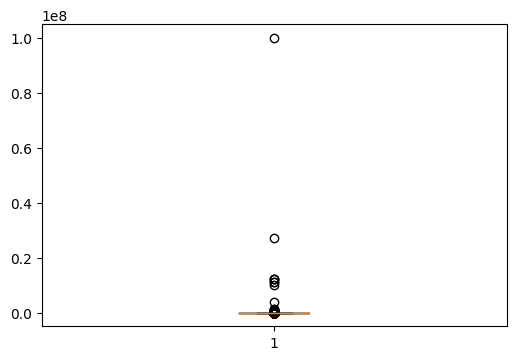

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

#autos.boxplot(column=['usd_price'])
plt.boxplot(autos["usd_price"]) 
plt.show()

We can also use the scatter graph to represent our data's distribution. **I still don't know if there is a better way to represent this, I use the `usd_price` in x and y axes, but I'm super open to feedback here**.

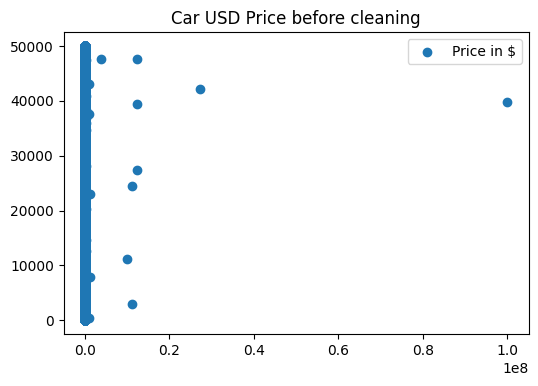

In [ ]:
#from matplotlib import pyplot as plt
#import numpy as np
 
#autos['usd_price'].value_counts()

plt.scatter(autos['usd_price'].values ,autos['usd_price'].index, label="Price in $")
plt.title("Car USD Price before cleaning")
plt.legend()
plt.show()

### Identifying the outliers

Using the Boxplot method from Matplotlib, we can visually represent the distribution of our data. The circles we can see are outliers from our data. But how do we know exactly which values we need to drop? Let's use the **IQR** or **Inter Quartile Range** to do this. The **IQR** is a statistical measure used to measure the variability in a given data. In naive terms, it tells us inside what range the bulk of our data lies. 

We can use the **IQR** method of identifying outliers to set up a “fence” outside of Q1 and Q3. Any values that fall outside of this fence are considered outliers.

The **IQR** is calculated as the difference between the first quartile (the 25th percentile) and the third quartile (the 75th percentile) of a dataset. The outlier data points are the ones falling below Q1–1.5 IQR (the "lower fence") or above Q3 + 1.5 IQR (the "upper fence"). The IQR represents the interquartile range calculated by Q3 minus Q1 (Q3–Q1). So let's put it simple, by using formulas:

    IQR = 75th Percentile - 25th Percentile
    Lower fence = 25th Percentile - 1.5*(IQR)
    Upper fence = 75th Percentile + 1.5*(IQR)

Now that we know the method we will use to drop the outliers, let's implement it.

In [ ]:
quantile_25, quantile_75 = autos['usd_price'].quantile([0.25, 0.75])

IQR = quantile_75 - quantile_25

lower_fence = quantile_25 - (1.5 * IQR)
upper_fence = quantile_75 + (1.5 * IQR)

print('The value from the 25th percentile is: {:,}'.format(quantile_25))
print('The value from the 75th percentile is: {:,}'.format(quantile_75))

print('The IQR fence is: {:,}'.format(IQR))
print('The lower fence is: {:,}'.format(lower_fence))
print('The upper fence is: {:,}'.format(upper_fence))

The value from the 25th percentile is: 1,100.0
The value from the 75th percentile is: 7,200.0
The IQR fence is: 6,100.0
The lower fence is: -8,050.0
The upper fence is: 16,350.0


As we can see, the upper fence is 16,350, which makes sense since 75% of our data is near 7,200, and high values push the upper fence a little bit up to the 16k. On the other hand, the lower fence is -8,050, which is not wrong according to the method BUT in our case, knowing the business part, we will decide to keep the data from $1 up to the upper fence.

Let's see first how many values we will drop that are above the `upper_fence`.

In [ ]:
autos[autos['usd_price'] > upper_fence]

,date_crawled,name,usd_price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
15,2016-04-01 12:06:20,Corvette_C3_Coupe_T_Top_Crossfire_Injection,18900,test,coupe,1982,automatik,203,NaN,80000,6,benzin,sonstige_autos,nein,2016-04-01 00:00:00,61276,2016-04-02 21:10:48
21,2016-03-06 19:07:10,Porsche_911_Carrera_4S_Cabrio,41500,test,cabrio,2004,manuell,320,911,150000,4,benzin,porsche,nein,2016-03-06 00:00:00,65428,2016-04-05 23:46:19
22,2016-03-28 20:50:54,MINI_Cooper_S_Cabrio,25450,control,cabrio,2015,manuell,184,cooper,10000,1,benzin,mini,nein,2016-03-28 00:00:00,44789,2016-04-01 06:45:30
24,2016-04-03 11:57:02,BMW_535i_xDrive_Sport_Aut.,48500,control,limousine,2014,automatik,306,5er,30000,12,benzin,bmw,nein,2016-04-03 00:00:00,22547,2016-04-07 13:16:50
49,2016-03-27 15:36:42,Mercedes_Benz_CL_500__BlueEFFICIENCY__7G_TRONIC,56000,control,coupe,2012,automatik,435,cl,60000,2,benzin,mercedes_benz,nein,2016-03-27 00:00:00,34474,2016-04-05 11:47:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49948,2016-03-22 16:44:57,Hyundai_ix35_2.0_CRDi_4WD_Automatik,19900,test,suv,2013,automatik,184,i_reihe,70000,5,diesel,hyundai,nein,2016-03-22 00:00:00,96515,2016-04-06 06:45:11
49987,2016-03-22 20:47:27,Audi_A3_Limousine_2.0_TDI_DPF_Ambition__NAVI__...,21990,control,limousine,2013,manuell,150,a3,50000,11,diesel,audi,nein,2016-03-22 00:00:00,94362,2016-03-26 22:46:06
49990,2016-03-21 19:54:19,Mercedes_Benz_A_200__BlueEFFICIENCY__Urban,17500,test,limousine,2012,manuell,156,a_klasse,30000,12,benzin,mercedes_benz,nein,2016-03-21 00:00:00,58239,2016-04-06 22:46:57
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,24900,control,limousine,2011,automatik,239,q5,100000,1,diesel,audi,nein,2016-03-27 00:00:00,82131,2016-04-01 13:47:40


As we can see, we have 3,784 rows that are above the Upper fence that we will drop, plus the ones that have 0 as `usd_price` that are 1,421, which means that we will be diminishing our data set in 5,205 records leaving 44,795 rows. So let's do the outlier cleaning:

In [ ]:
autos = autos[autos['usd_price'].between(1, upper_fence)]

In [ ]:
autos['usd_price'].describe()

count    44795.000000
mean      4089.433620
std       3841.429247
min          1.000000
25%       1150.000000
50%       2700.000000
75%       5999.000000
max      16350.000000
Name: usd_price, dtype: float64

Perfect! Now that we have cleaned our `usd_price` we can graph it again.

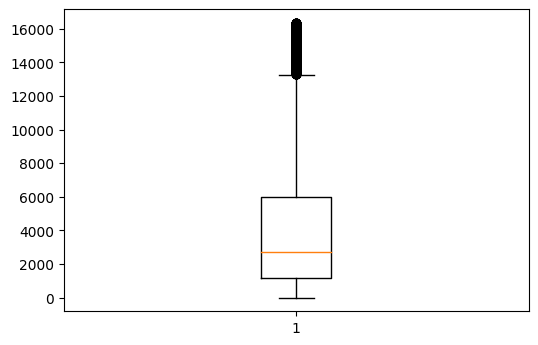

In [ ]:
plt.boxplot(autos["usd_price"])
plt.show()

From the Boxplot, we can see that our data is more compact in the area from $1,150 (the 25% percentile) to $5,999 (the 75th percentile). And we can see some circles as outliers, but those are included in our last IQR cleaning, so we are good to work with this data. 

To see the dispersion of our data, let's graph it using the Scatter graph once again.

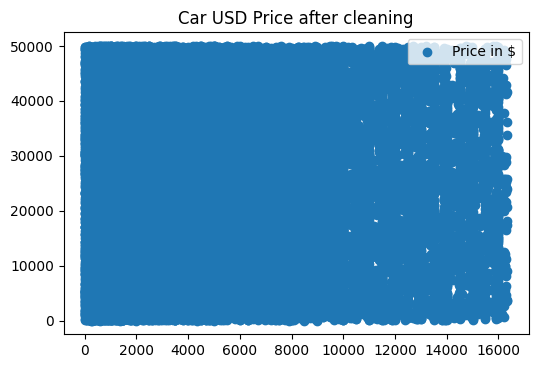

In [ ]:
plt.scatter(autos['usd_price'].values ,autos['usd_price'].index, label="Price in $")
plt.title("Car USD Price after cleaning")
plt.legend()
plt.show()

As we can see, the dispersion of the data points is much nearer than before the cleaning (see step 27 to compare it).

#### Observations:
1. Our dataset has been reduced to 44,795 rows in total. The 25th, 50th, and 75th percentiles are close to their initial values before cleaning.
2. The standard deviation (3,841USD) is considerably lower than the value of 480,000USD recorded before.
3. 16,350USD is a better approximation for the maximum price than the previous value of 100,000,000USD, considering that our 75th percentile is around 6,000USD.

Now, let's focus on the dates columns.

## Exploring the date columns

Let's now move on to the date columns and understand the date range the data covers.

There are 5 columns that should represent date values. Some of these columns were created by the crawler, some came from the website itself. We can differentiate by referring to the data dictionary:

- `date_crawled`: added by the crawler
- `last_seen`: added by the crawler
- `ad_created`: from the website
- `registration_month`: from the website
- `registration_year`: from the website

Right now, the date_crawled, last_seen, and ad_created columns are all identified as string values by pandas. Because these three columns are represented as strings, we need to convert the data into a numerical representation so we can understand it quantitatively. The other two columns are represented as numeric values, so we can use methods like Series.describe() to understand the distribution without any extra data processing.

Let's first understand how the values in the three string columns are formatted. These columns all represent full timestamp values, like so:

In [ ]:
autos[['date_crawled','ad_created','last_seen']][0:5]
#Alternatively way:
#autos.loc[0:5, ['date_crawled','ad_created','last_seen']]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


In [ ]:
print(autos['date_crawled'].str[:10].head())

0    2016-03-26
1    2016-04-04
2    2016-03-26
3    2016-03-12
4    2016-04-01
Name: date_crawled, dtype: object


In [ ]:
print(autos['date_crawled'].str[:10].unique().size)

date_crawled = (autos['date_crawled'].str[:10].value_counts(
    normalize=True, dropna=False)*100).apply(
    lambda x: '%.2f%%' % x).sort_index()

print(date_crawled)

34
2016-03-05    2.55%
2016-03-06    1.40%
2016-03-07    3.61%
2016-03-08    3.36%
2016-03-09    3.31%
2016-03-10    3.27%
2016-03-11    3.25%
2016-03-12    3.74%
2016-03-13    1.56%
2016-03-14    3.70%
2016-03-15    3.42%
2016-03-16    3.00%
2016-03-17    3.20%
2016-03-18    1.28%
2016-03-19    3.42%
2016-03-20    3.77%
2016-03-21    3.72%
2016-03-22    3.27%
2016-03-23    3.25%
2016-03-24    2.94%
2016-03-25    3.20%
2016-03-26    3.26%
2016-03-27    3.07%
2016-03-28    3.48%
2016-03-29    3.42%
2016-03-30    3.39%
2016-03-31    3.16%
2016-04-01    3.28%
2016-04-02    3.50%
2016-04-03    3.85%
2016-04-04    3.64%
2016-04-05    1.29%
2016-04-06    0.32%
2016-04-07    0.13%
Name: date_crawled, dtype: object


Looks like the site was crawled daily over roughly a one-month period in March and April 2016. The distribution of listings crawled on each day is roughly uniform.

In [ ]:
print(autos['last_seen'].str[:10].unique().size)

last_seen = (autos['last_seen'].str[:10].value_counts(
    normalize=True, dropna=False)*100).apply(
    lambda x: '%.2f%%' % x).sort_index()

print(last_seen)

34
2016-03-05     0.12%
2016-03-06     0.46%
2016-03-07     0.57%
2016-03-08     0.79%
2016-03-09     1.01%
2016-03-10     1.12%
2016-03-11     1.30%
2016-03-12     2.49%
2016-03-13     0.94%
2016-03-14     1.29%
2016-03-15     1.63%
2016-03-16     1.70%
2016-03-17     2.90%
2016-03-18     0.76%
2016-03-19     1.65%
2016-03-20     2.12%
2016-03-21     2.12%
2016-03-22     2.19%
2016-03-23     1.91%
2016-03-24     2.04%
2016-03-25     2.00%
2016-03-26     1.72%
2016-03-27     1.62%
2016-03-28     2.17%
2016-03-29     2.30%
2016-03-30     2.55%
2016-03-31     2.43%
2016-04-01     2.33%
2016-04-02     2.52%
2016-04-03     2.57%
2016-04-04     2.50%
2016-04-05    12.13%
2016-04-06    21.43%
2016-04-07    12.62%
Name: last_seen, dtype: object


The crawler recorded the date it last saw any listing, which allows us to determine on what day a listing was removed, presumably because the car was sold.

The last three days contain a disproportionate amount of 'last seen' values. Given that these are 6-10x the values from the previous days, it's unlikely that there was a massive spike in sales and more likely that these values are to do with the crawling period ending and don't indicate car sales.

In [ ]:
print(autos['ad_created'].str[:10].unique().size)

ad_created = (autos['ad_created'].str[:10].value_counts(
    normalize=True, dropna=False)*100).apply(
    lambda x: '%.4f%%' % x).sort_index()

print(ad_created)

73
2015-08-10    0.0022%
2015-09-09    0.0022%
2015-11-10    0.0022%
2015-12-05    0.0022%
2015-12-30    0.0022%
               ...   
2016-04-03    3.8799%
2016-04-04    3.6701%
2016-04-05    1.1653%
2016-04-06    0.3237%
2016-04-07    0.1183%
Name: ad_created, Length: 73, dtype: object


There is a large variety of ad-created dates. Most fall within 1-2 months of the listing date, but a few are quite old, with the oldest at around 9 months.

In [ ]:
autos['registration_year'].describe()

count    44795.00000
mean      2003.97339
std         74.81955
min       1000.00000
25%       1999.00000
50%       2003.00000
75%       2007.00000
max       9999.00000
Name: registration_year, dtype: float64

#### Observations

The registration year column contains some unexpected values:
The minimum value is 1000, this is long before 1885 when cars were invented.

The maximum value is 9999, many years into the future. We are also aware that the crawler last saw the listings in 2016. A car can't be first registered after its listing has been seen.

Since we know that cars were invented in 1885, we can use the first few decades of the 1900s as our lower cut-off point. At the higher end, any record above 2016 is inaccurate since the dataset is from 2016. *Sometimes car dealers sell new cars from the next year during the current year, but since we are analyzing the auction cars from eBay we will take them into consideration until 2016).*

Before we eliminate these rows, let's count the number of listings with cars that fall outside the 1900 - 2016 registration year and see if it's safe to remove these rows entirely without impacting our analysis too much.

In [ ]:
invalid_rows = (~(autos['registration_year'].between(1900, 2016))).sum()
total_rows = autos['registration_year'].shape[0]
percentage_invalid = invalid_rows/total_rows

print('The invalid years constitute {:.2f}% of the total data'.format(percentage_invalid * 100))

The invalid years constitute 4.10% of the total data


Since these years constitute only 4.1% of our total data. We can safely eliminate these records from our analysis:

In [ ]:
autos = autos[autos['registration_year'].between(1900, 2016)]

autos['registration_year'].describe()

count    42959.000000
mean      2002.395191
std          6.750207
min       1910.000000
25%       1999.000000
50%       2003.000000
75%       2007.000000
max       2016.000000
Name: registration_year, dtype: float64

In [ ]:
# Many ways to select rows in a dataframe that fall within a value range for a column.
# Using `Series.between()` is one way.
autos = autos[autos["registration_year"].between(1900,2016)]
(autos["registration_year"].value_counts(normalize=True)*100).apply(
    lambda x: '%.2f%%' % x).head(10)

2000    7.31%
2005    6.72%
1999    6.72%
2003    6.21%
2004    6.19%
2001    6.09%
2006    6.01%
2002    5.73%
1998    5.47%
2007    4.95%
Name: registration_year, dtype: object

### Observations
- It appears that most of the vehicles were registered between 1990 and 2010. 
- Only a small proportion of listed cars were registered before 1990.

## Exploring Price by Brand

Let's explore the unique values in the brand column to identify the most common brands in the used car listings:

In [ ]:
autos['brand'].describe()

count          42959
unique            40
top       volkswagen
freq            9226
Name: brand, dtype: object

In [ ]:
autos['brand'].unique()

array(['peugeot', 'bmw', 'volkswagen', 'smart', 'ford', 'chrysler',
       'seat', 'renault', 'mercedes_benz', 'audi', 'opel', 'mazda',
       'mini', 'toyota', 'dacia', 'nissan', 'jeep', 'saab', 'volvo',
       'mitsubishi', 'fiat', 'skoda', 'subaru', 'sonstige_autos', 'kia',
       'citroen', 'porsche', 'hyundai', 'chevrolet', 'honda', 'daewoo',
       'suzuki', 'trabant', 'land_rover', 'jaguar', 'alfa_romeo', 'lada',
       'rover', 'daihatsu', 'lancia'], dtype=object)

In [ ]:
(autos['brand'].value_counts(normalize=True, dropna=False)*100).apply(
    lambda x: '%.2f%%' % x)

volkswagen        21.48%
opel              11.52%
bmw               10.35%
mercedes_benz      8.81%
audi               7.76%
ford               7.31%
renault            5.08%
peugeot            3.22%
fiat               2.77%
seat               1.91%
skoda              1.70%
mazda              1.61%
nissan             1.58%
smart              1.54%
citroen            1.50%
toyota             1.34%
hyundai            1.05%
volvo              0.93%
mitsubishi         0.87%
sonstige_autos     0.85%
honda              0.83%
mini               0.78%
alfa_romeo         0.70%
kia                0.70%
suzuki             0.64%
chevrolet          0.57%
chrysler           0.37%
dacia              0.29%
daihatsu           0.27%
subaru             0.22%
jeep               0.20%
porsche            0.19%
saab               0.18%
daewoo             0.16%
trabant            0.15%
rover              0.14%
land_rover         0.13%
jaguar             0.12%
lancia             0.11%
lada               0.06%


German manufacturers represent four of our top five brands, almost 50% of the overall listings. Volkswagen is the most popular brand, with approximately double the cars for sale of the next two brands combined.

There are lots of brands that don't have a significant percentage of listings, so we will limit our analysis to brands representing more than 5% of total listings.

In [ ]:
autos_percentages = autos['brand'].value_counts(normalize=True, dropna=False)
top_5_percent = autos_percentages[autos_percentages > 0.05]
print(top_5_percent)
print("The top 5% of the cars represents: {:.2%} of the total".format(top_5_percent.sum()))


volkswagen       0.214763
opel             0.115203
bmw              0.103541
mercedes_benz    0.088131
audi             0.077562
ford             0.073093
renault          0.050769
Name: brand, dtype: float64
The top 5% of the cars represents: 72.31% of the total


As we can see from filtering, the top 5% of brands represent 72.31% of all the cars in the dataset. So let's continue to work with these. We will dive deeper into these top brands and we will explore: 
- The number of cars by brand
- The average price by brand

In [ ]:
# extract the names of the top 7 brands
top_brands = (autos['brand']
                  .value_counts()
                  .head(7)
             )

top_brands

volkswagen       9226
opel             4949
bmw              4448
mercedes_benz    3786
audi             3332
ford             3140
renault          2181
Name: brand, dtype: int64

Let's represent this in a graph.

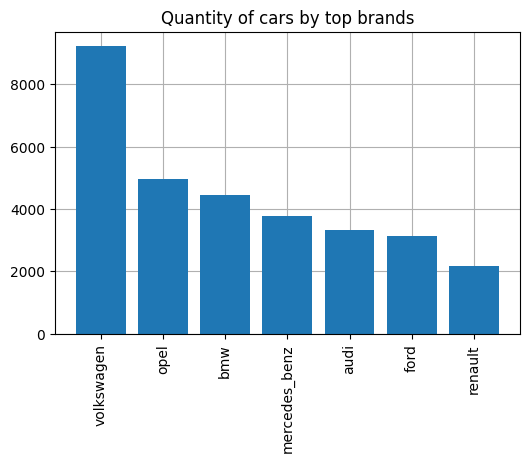

In [ ]:
plt.bar(top_brands.index ,top_brands.values, align='center', zorder=2)
plt.title("Quantity of cars by top brands")
plt.grid(zorder=0)
plt.xticks(rotation=90)
plt.show()

We can easily see that Volkswagen cars are almost double that of the nearest brand, Opel.

Now let's see what the average price per brand is. For this, we will create a Dictionary of Brand: Average price.

In [ ]:
brand_counts = autos["brand"].value_counts(normalize=True)
common_brands = brand_counts[brand_counts > .05].index
print(common_brands)

brand_mean_prices = {}

for brand in common_brands:
    
    prices = autos['usd_price'][autos['brand'] == brand]
    mean_price = prices.mean()
    brand_mean_prices[brand] = int(mean_price)

#We convert the dictionary into a series to sort it easily and represent it later.
brand_mean_prices_series = pd.Series(brand_mean_prices) 
brand_mean_prices_series = brand_mean_prices_series.sort_values(ascending=False)
    
print(brand_mean_prices_series)

Index(['volkswagen', 'opel', 'bmw', 'mercedes_benz', 'audi', 'ford',
       'renault'],
      dtype='object')
audi             5703
bmw              5649
mercedes_benz    5259
volkswagen       4183
ford             2944
opel             2712
renault          2281
dtype: int64


Let's do a graph to visualize it.

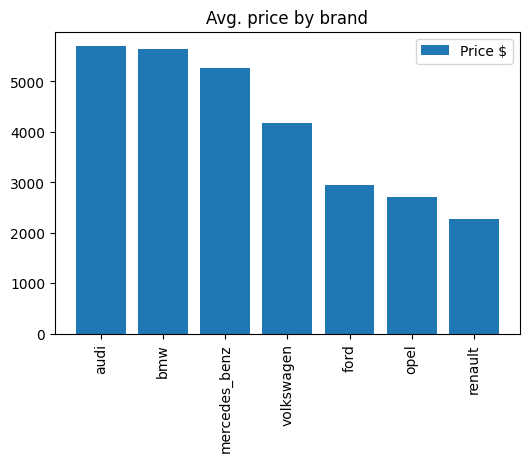

In [ ]:
fig, ax = plt.subplots()

plt.bar(brand_mean_prices_series.index, brand_mean_prices_series.values, label="Price $", align='center', zorder=2)
plt.title("Avg. price by brand")
plt.legend()
plt.xticks(rotation=90)
plt.show()

We can see that Audi and BMW have pretty similar average prices above `$5.5k`, and then Mercedes Benz and Volkswagen follow over `$4k`, and Ford and Opel are less expensive. This means that in Germany, European cars are more likely to retain a better resell price than other foreign brands.

## Exploring the Mileage data

For the top 7 brands, we will use aggregation to understand the average mileage for those cars and if there's any visible link with the mean price. Rather than display both aggregated series objects and visually compare them, we will combine the data from both series objects into a single data frame (with a shared index) and display the data frame directly.

We have already converted our aggregate_price dictionary into the Pandas series object - price_series using the pd.Series() constructor. Next, we will convert the series object into a Dataframe using the pd.DataFrame() constructor:

In [ ]:
auto_price_mileage = pd.DataFrame(brand_mean_prices_series, columns=['avg_price'])
auto_price_mileage

,avg_price
audi,5703
bmw,5649
mercedes_benz,5259
volkswagen,4183
ford,2944
opel,2712
renault,2281


In [ ]:
brand_mean_km = {}

for brand in common_brands:
    
    km = autos['odometer_km'][autos['brand'] == brand]
    mean_km = km.mean()
    brand_mean_km[brand] = int(mean_km)

#We convert the dictionary into a series to sort it easily and represent it later.
brand_mean_km_series = pd.Series(brand_mean_km) 
brand_mean_km_series = brand_mean_km_series.sort_values(ascending=False)

print(brand_mean_km_series)

audi             139701
bmw              138833
mercedes_benz    138411
volkswagen       132813
opel             130500
renault          128892
ford             127004
dtype: int64


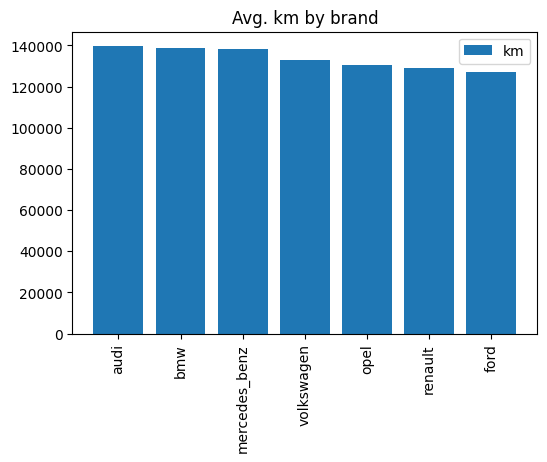

In [ ]:
fig, ax = plt.subplots()

plt.bar(brand_mean_km_series.index, brand_mean_km_series.values, label="km", align='center', zorder=2)
plt.title("Avg. km by brand")
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [ ]:
auto_price_mileage['avg_km'] = brand_mean_km_series
auto_price_mileage.sort_values(ascending=False, by='avg_price')

,avg_price,avg_km
audi,5703,139701
bmw,5649,138833
mercedes_benz,5259,138411
volkswagen,4183,132813
ford,2944,127004
opel,2712,130500
renault,2281,128892


### Observations

We would expect car prices to fall as mileage increases. However this is not the case here as we notice the more expensive vehicles having higher mileage, and the cheaper ones recording lower mileage.

# Conclusion

**In our analysis of eBay Kleinanzeigen's listings, we identified the most popular cars on the website listings. We examined the relationship between mileage-price, which showed no influence between the price and mileage from the top 5% of cars in the dataset.**

## Future steps

Here are some next steps we can consider:

### Data cleaning next steps:
- Identify categorical data that uses german words, translate them and map the values to their English counterparts
- Convert the dates to be uniform numeric data, so "2016-03-21" becomes the integer 20160321.
- See if there are particular keywords in the name column that you can extract as new columns

### Analysis next steps:
- Find the most common brand/model combinations
- Split the odometer_km into groups, and use aggregation to see if average prices follow any patterns based on the mileage.
- How much cheaper are cars with damage than their non-damaged counterparts?